# Blinded by Beauty: Attractiveness Bias and Accurate Perceptions of Academic Performance [1]

#### Напишано од: Sean N. Talamas, Kenneth I. Mavor David I. Perrett 
School of Psychology and Neuroscience, University of St Andrews, St Andrews, United Kingdom
#### Тетратката е изработена од: Јана Николовска
Предмет: Методологија на истражување на ИКТ <br>
ФИНКИ, УКИМ

Најчесто првиот впечаток за луѓето кои ги запознаваме го донесуваме врз основа на изгледот на неговото лице и овој впечаток потоа го користиме како водич за донесување на понатамошни одлуки во врска со човекот. Во литературата има повеќе сугестии дека одредени делови од изгледот на лицето можат да ни помогнат во проценување на здравјето или интелигенцијата на човекот кој го набљудуваме, но истите се засенети од т.н “attractiveness halo” со кое се доловува дека привлечните луѓе ги проценуваме со посакуваните одлики. Во трудот Blinded by Beauty: Attractiveness Bias and Accurate Perceptions of Academic Performance, се истражува влијанието на “attractiveness halo” на перцепцијата на академското достигнување на лица на 100 студенти . Дополнително се истражува и прават споредби за предвидувањата на академското знаење ако ги земеме во предвид 1) перципираната интелигентност и 2) перциприраната трудољубивост. Овие пронаоѓања го потенцираат залажувачкиот ефект на привлечноста на точноста за компетентноста на човекот, кој може да сериозни последици на  полиња како што се образование и вработување.

In [1]:
import pandas as pd
import statistics as stat
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from IPython.display import YouTubeVideo

colors = ['#9ad3bc','#f5b461','#ec524b','#f3eac2']

layout = go.Layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)'
)

### Хипотеза

Постои “Attractiveness Halo” така што иако привлечноста не е поврзана со академско постигнување, таа е високо корелирана со личната-перцепција на академско постигнување на даден човек.  Со други зборови, со контролирање на привлечноста можеме да откриеме “blinded by beauty” феномен во доменот на академското достигнување сличен на оној кој е пронајден во полињата на здравјето и интелигенцијата.

### Метод на истражување и собирање на податоци

Сите вклучени во истражувањето имаат потпишано согласност за употреба на нивните податоци и истатa процедура на согласност е одобрена од етичкиот комитет.

##### 1) Стимули

Студенти на универзитетот St. Andrews се рекруирани да учествувааат во експеримент наречен “Influences in the perception of intelligence in faces”. Сто од најстандардните (избричени, со неѕтрална експресија и позиционирање на главата ) лица се избрани како стимули. Ситте лица се од бела раса и помеѓу 18-24 години. Фотографиите нод овие лица се направени под истото стандардизирано светло и со истите параметри за сликање поставени на камерата, без коса што би попрачувала на лицето, без шминка или накит. Сликите се израмнети со референтни точки на зениците на лицето што е фотографирано, со големина 1608џ2584 пиксели и на таков начин што еднаква пропорција на коса и врат се гледа на сите. Академскиот успех е превземен од базата на податоци на универзитетот. Успехот е на скала од 1-20, со вредности со 1 децимала и е пресметан преку Grade Point Average (GPA) за секоја година пресметан тежински во однос на кредитите завршени од тој студент. 

##### 2) Испитаници

Четири посебни групи испитаници  се рекруирани и платени да оценат перципирана  привлечност, интелигенција, трудољубивост  и академско постигнување. Испитаниците се од белата раса, за да се спречат елементи на можно осудување или потпаѓање под стереотипи при оценувањето. Најпрво се прикауваат сите слики една по една во времетраење од 1 секунда за секоја слика посебно, па потоа се прикауваат повторно за да може да се запишат оценките на испитаниците. Редоследот на прикажување е случаен. Вториот пат времето на прикажување не е ограничено, но со цел да се избегне неодговорен (случајно, без перцепирање на стимулот) одговор од испитаникот  можноста за оценување се појавува со задоцнувањеод 1 секунда после прикажувањето на сликата. Оценувањето е на скала од 1-7 и за секое од оценувањата прикажан е текст со кој се искажува барањето. Во табелата во продолжение може да се разгледа подетално изборот на испитаниците

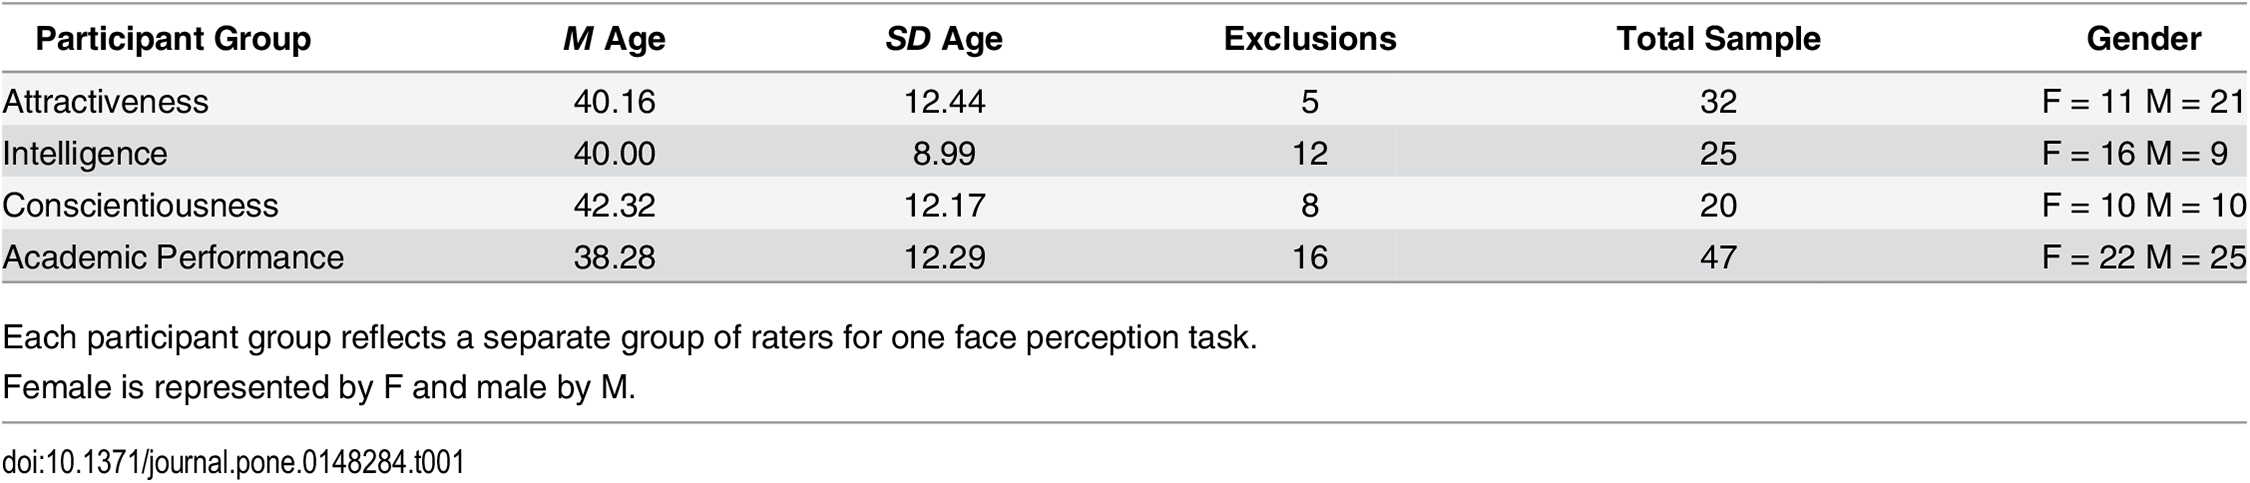

##### 3) Добиени податоци

In [2]:
data = pd.read_spss("BLINDED_BY_BEAUTY_PLOSONE_1.sav")
data = data.astype(float)
print("Број на лица: "+ str(len(data.index)))
print("Број на атрибути кои опишуват едно лице: "+str(len(data.columns)))
features = ["Реден број", "Возраст","Пол","GPA - мерка за акдемско достигнување","просечна перципирана трудољубивост за едно лице","просечно перципирано академско достигнување за едно лице","просечна перципирана интелигенција за едно лице","просечна перципирана привлечност за едно лице"]
i=0
for column in data.columns:
    print("\t"+ str(i+1)+ ". " + column + " - " +features[i] )
    i = i+1

print("\n")
print("Вкупна просечна перципирана трудољубивост: " + str(round(stat.mean(data["CON_W"].values),4)))
print("Вкупнo просечно перципирано академско достигнување: "+ str(round(stat.mean(data["AP_W"].values),4)))
print("Вкупна просечна перципирана интелигенција: "+ str(round(stat.mean(data["INTEL_W"].values),4)))
print("Вкупна просечна перципирана привлечност: "+ str(round(stat.mean(data["ATTR_W"].values),4)))
print("* пресметани просечно за сите 100 лица, оценувано на скала 1-7")

Број на лица: 100
Број на атрибути кои опишуват едно лице: 8
	1. ID_NUM - Реден број
	2. Age - Возраст
	3. Sex - Пол
	4. GPA - GPA - мерка за акдемско достигнување
	5. CON_W - просечна перципирана трудољубивост за едно лице
	6. AP_W - просечно перципирано академско достигнување за едно лице
	7. INTEL_W - просечна перципирана интелигенција за едно лице
	8. ATTR_W - просечна перципирана привлечност за едно лице


Вкупна просечна перципирана трудољубивост: 4.2836
Вкупнo просечно перципирано академско достигнување: 4.2665
Вкупна просечна перципирана интелигенција: 4.3174
Вкупна просечна перципирана привлечност: 3.8338
* пресметани просечно за сите 100 лица, оценувано на скала 1-7


Дистрибуција на добиените оценки за секој од бараните одговори:

In [3]:
fig = go.Figure(layout=layout)

i =0
for column in data.columns.to_list()[-4:]:
    fig.add_trace(
        go.Histogram(
            x = data[column],
            name = column,
            marker_color=colors[i]
        )
    )
    i = i+1
    
fig.update_layout(
    updatemenus=[go.layout.Updatemenu(
        active=0,
        buttons=list(
            [dict(label = 'Перцепирана трудољубивост',
                  method = 'update',
                  args = [{'visible': [True, False, False, False]}, # the index of True aligns with the indices of plot traces
                          {'title': 'Перцепирана трудољубивост',
                           'showlegend':True}]),
             dict(label = 'Перцепирано академско знаење',
                  method = 'update',
                  args = [{'visible': [False, True, False, False]},
                          {'title': 'Перцепирано академско знаење',
                           'showlegend':True}]),
             dict(label = 'Перцепирана интелигенција',
                  method = 'update',
                  args = [{'visible': [False, False, True, False]},
                          {'title': 'Перцепирана интелигенција',
                           'showlegend':True}]),
             dict(label = 'Перцепирана привлечност',
                  method = 'update',
                  args = [{'visible': [False, False, False, True]},
                          {'title': 'Перцепирана привлечност',
                           'showlegend':True}]),
            ])
        )
    ])

fig.update_layout(height=400, width=900)
fig.show()


### Резултати

Земајќи ја во предвид Zero-Order матрицата на корелација помеѓу секој од атрибутите (прикажана подоле) , Talamas, Mavor и Perrettсе забележуваат недостаток на поврзаност помеѓу перцептираната привлечност и академското достигнување (r=0.03), но јасна врска помеѓу перцептираната привлечност и перцептираното академско постигнување (r=0.81), како и помеѓу перцептираната привлечност и перцептираната интелигенција (r=0.74) 

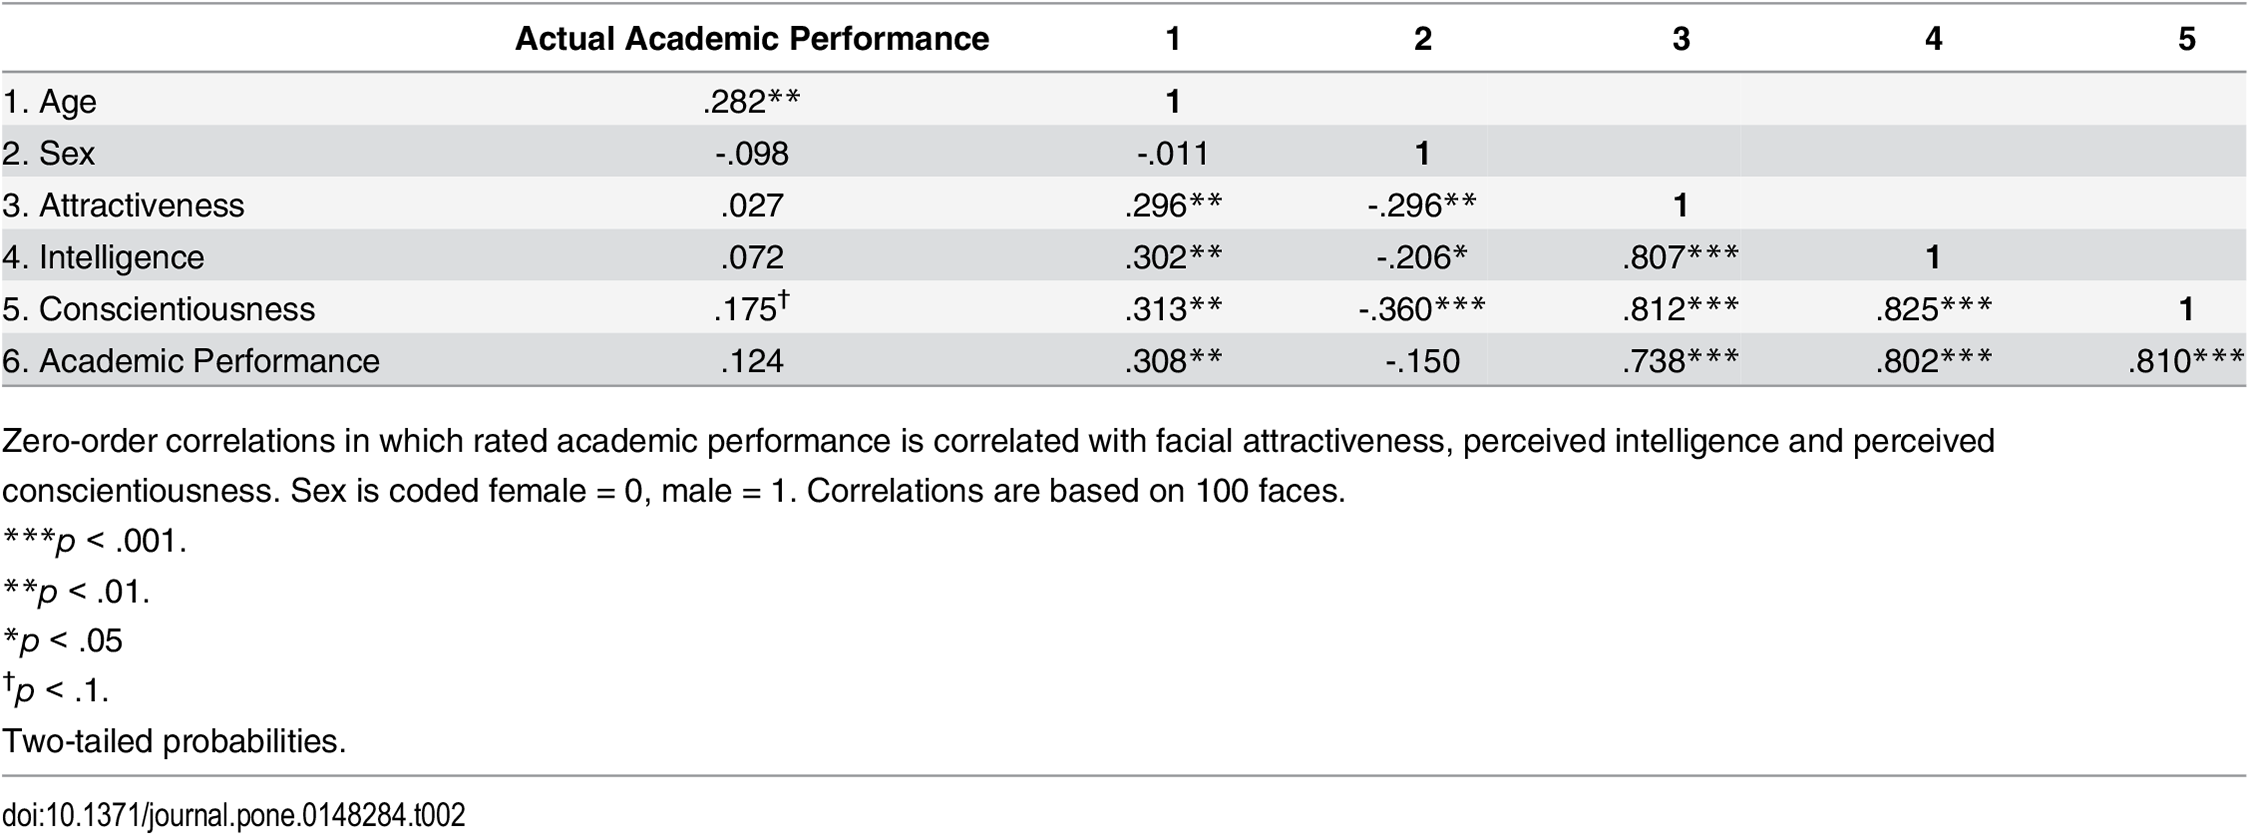

Прикази на корелираноста на атрибутите горе спомнaти со помош на scatter plots.

In [4]:
fig = make_subplots(rows=1, cols=3,horizontal_spacing = 0.12,print_grid=False)

attributes = ["GPA","AP_W","INTEL_W"]

i = 0
for attribute in attributes:
    i = i+1
    fig.add_trace(
    go.Scatter(x=data["ATTR_W"], y=data[attribute],mode='markers',marker_color=colors[i-1]),
        row=1, col=i)

fig['layout']['xaxis']['title']='Перцепирана привлечност'
fig['layout']['yaxis']['title']='Академско достигнување'
fig['layout']['xaxis2']['title']='Перцепирана привлечност'
fig['layout']['yaxis2']['title']='Перцепирано академско достигнување'
fig['layout']['xaxis3']['title']='Перцепирана привлечност'
fig['layout']['yaxis3']['title']='Перцепирана интелигенција'
fig.update_layout(height=400, width=900,showlegend=False)
fig.show()

За да се исклучат сомнежи за мулти - корелираност  на атрибутуте се прави и проверка на VIF коефициентите. Тие се пресметуваат со формула

$ VIF = \frac{1}{1-R^{2}} $

каде што $ R^{2} $ претставува коефициент на детерминација на линеарна регресија. Неговите вредности се помеѓу 0 и 1. VIF коефициенти над 10 укажуваат за мулти-корелација помеѓу атрибутите, и според резултатите добиени од истражувањето можеме да заклучиме дека тоа не е случај со никој од атрибутите

In [5]:
vif_scores = [5.18, 4.24, 6.58, 4.11]

fig = go.Figure(data=[go.Table(header=dict(values=["Attribute","VIF score"],fill_color=colors[1]),
                 cells=dict(values=[data.columns[-4:].tolist(),vif_scores],fill_color=colors[3]))
               ])
fig.update_layout(height=350, width=350,showlegend=False)
fig.show()

Дополнително во насока на докажување на хипотезата направена е и визуелизација за споредба на Zero-Order Correlation и Partial Correlation (Controlling for Attractiveness) за секој од трите атрибути (Perceived Attractiveness, Perceived Intelligence, Perceived Conscientiousness. Парцијалната корелација покажува сигнификантна корелација помеѓу перцептираната трудољубивост и академското постигнување (r=0.22, p = 0.035), но и никаква поврзаност помеѓу академското достигнување и перцептираното академско постигнување (r=0.13, p = 0.191) или перцептираната интелигенција (r=0.06, p = 0.544). Истото може да се разгледа и од графикот

<div>
<img src="Figure1.PNG" width="500"/>
</div>

### Заклучок

Во својот труд Talamas, Mavor и Perrettсе стигнуваат до три поважни заклучоци. Прво, не постои First Order корелација помеѓу перцептираните трудољубивост, академско достигнување и интелигенција од едната страна и вистинското академско достигнување од другата. Второ, со контролирање на привлечноста, добиваме поточни резултати во впечатокот за нечија компетентност - т.е дека привлечноста игра голема улога во нашите впечатоци за компетентност на набљудуваниот човек. Трето, од сите можни перцепирани квалитети што ги разгледавме, трудољубивоста е најблиску корелирана со вистинското академско знаење (повисоко отколку перцептираната атрактивност, интелигенција и перцептираното академско знаење). Кога ќе ги земеме сите резултати во предвид и заклучоците можеме да тврдиме дека поставената хипотеза е потврдена

### Дополнителни материјали:

Blinded by beauty - Sean Talamas | TEDxUniversityofDundee

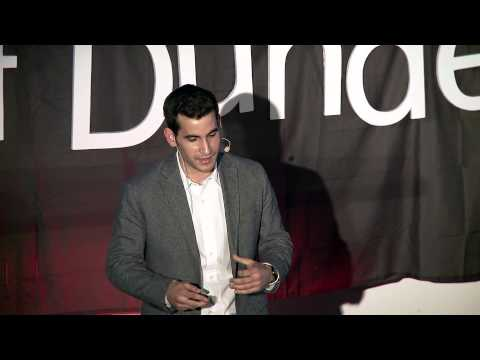

In [6]:
YouTubeVideo('Ay9cf8X9N4Q', width=600, height=300)

### Референци

[1] S.N.Talamas, K.I.Mavor, D.I.Perrett. (2016, February). “Blinded by Beauty - Attractiveness Bias and Accurate Perceptions of Academic Performance.” PLoS ONE. 11, 2, https://journals.plos.org/plosone/article/file?id=10.1371/journal.pone.0148284&type=printable
